In [48]:
#NOAA website

#Jason Glass

# SNOW PREDICTION

#Jason Glass 

#Professor Minwoo Lee 

#ITCS 3156 Intro to Machine Learning 

#November 19, 2025 

#jupyterlab weather snow prediction...

In [49]:
# for the weather use this link below...

#video link: https://www.youtube.com/watch?v=YY8JYbEO3Ow

#website link from video: https://www.ncdc.noaa.gov/cdo-web/search

In [50]:
from typing import List, Dict, Tuple, Callable
import os
import gc
import traceback
import warnings
from pdb import set_trace

import sklearn
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


from typing import List, Dict, Tuple, Callable, Union
import os, traceback, warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import sklearn
from sklearn.datasets import load_wine, load_sample_image
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression

import pandas as pd
from numpy import arange
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import RepeatedKFold
from sklearn.metrics import mean_squared_error, r2_score



In [51]:
df = pd.read_csv('4177107.csv') # my weather dataframe name. 


#also the 5 columns that are both kept and used: 

#AWND (average wind speed)

#PRCP (precipitation)

#SNOW

#TMAX ( maximum temperature)

#TMIN (minimum temperature)

# station id: GHCND:USW00013881

# this is station 'Charlotte Douglas International Airport'



In [52]:
df #dataframe

,STATION,LATITUDE,LONGITUDE,ELEVATION,DATE,AWND,AWND_ATTRIBUTES,PRCP,PRCP_ATTRIBUTES,SNOW,SNOW_ATTRIBUTES,TMAX,TMAX_ATTRIBUTES,TMIN,TMIN_ATTRIBUTES
0,USW00013881,35.22254,-80.95433,222.6,1990-01-01,14.54,",,X",0.03,",,0,2400",0.0,",,0,",58,",,0",32,",,0"
1,USW00013881,35.22254,-80.95433,222.6,1990-01-02,5.14,",,X",0.00,",,0,2400",0.0,",,0,",49,",,0",23,",,0"
2,USW00013881,35.22254,-80.95433,222.6,1990-01-03,6.04,",,X",0.00,",,0,2400",0.0,",,0,",59,",,0",33,",,0"
3,USW00013881,35.22254,-80.95433,222.6,1990-01-04,7.61,",,X",0.07,",,0,2400",0.0,",,0,",57,",,0",49,",,0"
4,USW00013881,35.22254,-80.95433,222.6,1990-01-05,4.70,",,X",0.15,",,0,2400",0.0,",,0,",57,",,0",51,",,0"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13107,USW00013881,35.22254,-80.95433,222.6,2025-11-20,NaN,NaN,0.00,"T,,D,2400",0.0,",,D,2400",70,",,D",53,",,D"
13108,USW00013881,35.22254,-80.95433,222.6,2025-11-21,NaN,NaN,0.00,"T,,D,2400",0.0,",,D,2400",70,",,D",58,",,D"
13109,USW00013881,35.22254,-80.95433,222.6,2025-11-22,NaN,NaN,0.00,"T,,D,2400",0.0,",,D,2400",80,",,D",63,",,D"
13110,USW00013881,35.22254,-80.95433,222.6,2025-11-23,NaN,NaN,0.00,",,D,2400",0.0,",,D,2400",73,",,D",51,",,D"


In [53]:
#perform basic ( visual) analysis

new_df = df.drop(['AWND_ATTRIBUTES', 'PRCP_ATTRIBUTES', 'SNOW_ATTRIBUTES', 'TMAX_ATTRIBUTES', 'TMIN_ATTRIBUTES', 'STATION', 'LATITUDE', 'LONGITUDE', 
                 'ELEVATION'], axis=1)

In [54]:
new_df #dataframe with many dropped columns


,DATE,AWND,PRCP,SNOW,TMAX,TMIN
0,1990-01-01,14.54,0.03,0.0,58,32
1,1990-01-02,5.14,0.00,0.0,49,23
2,1990-01-03,6.04,0.00,0.0,59,33
3,1990-01-04,7.61,0.07,0.0,57,49
4,1990-01-05,4.70,0.15,0.0,57,51
...,...,...,...,...,...,...
13107,2025-11-20,NaN,0.00,0.0,70,53
13108,2025-11-21,NaN,0.00,0.0,70,58
13109,2025-11-22,NaN,0.00,0.0,80,63
13110,2025-11-23,NaN,0.00,0.0,73,51


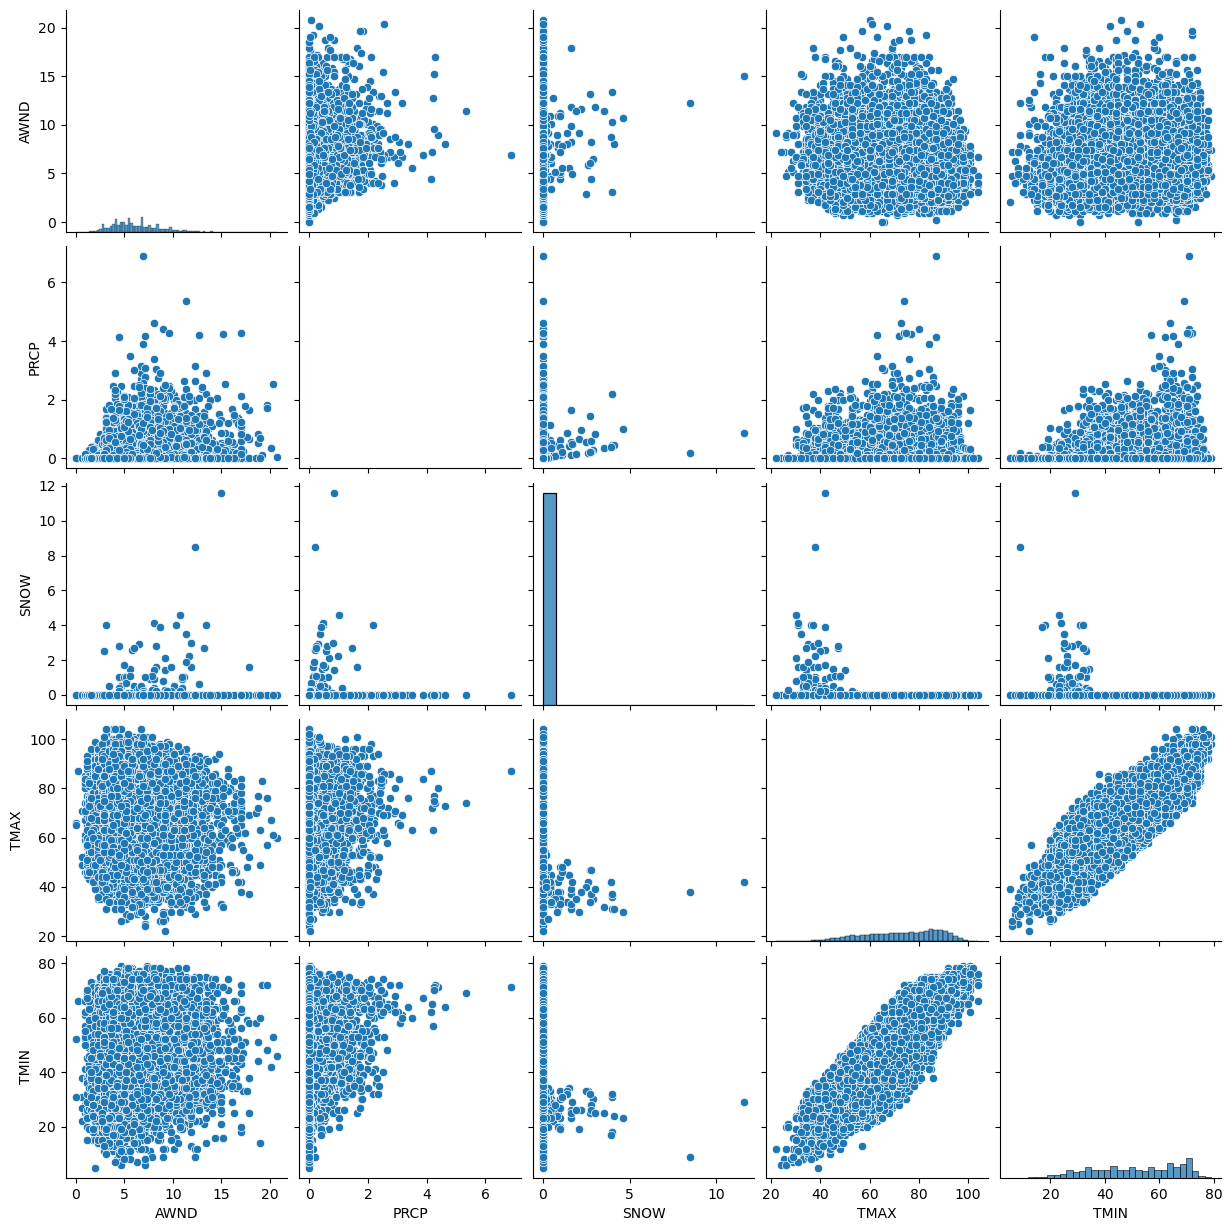

In [55]:
sns.pairplot(new_df)
plt.show()

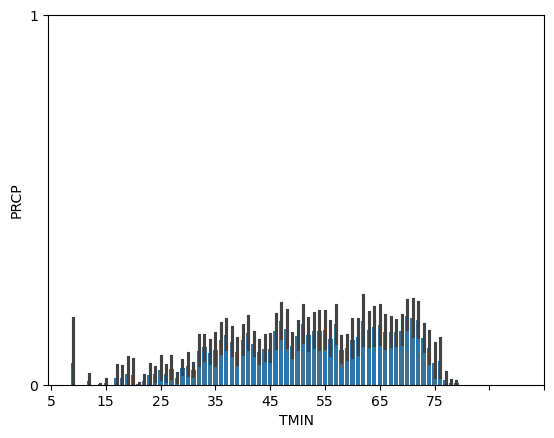

In [56]:
#bar plot
sns.barplot(x='TMIN', y='PRCP', data=new_df)
plt.xticks(range(0,100, 10))
plt.yticks(range(0,2,1))
plt.show()
#sns.pointplot(x='TMIN', y='PRCP', data=new_df, set_visible=False)




            

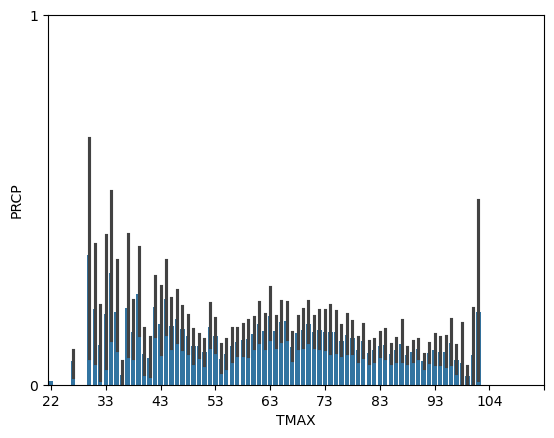

In [57]:
sns.barplot(x='TMAX', y='PRCP', data=new_df)
plt.xticks(range(0,100, 10))
plt.yticks(range(0,2,1))
plt.show()



In [58]:
#preprocessing. dropped attribute features. dropped null rows

new_df.head()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
0,1990-01-01,14.54,0.03,0.0,58,32
1,1990-01-02,5.14,0.00,0.0,49,23
2,1990-01-03,6.04,0.00,0.0,59,33
3,1990-01-04,7.61,0.07,0.0,57,49
4,1990-01-05,4.70,0.15,0.0,57,51


In [59]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13112 entries, 0 to 13111
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    13112 non-null  object 
 1   AWND    13016 non-null  float64
 2   PRCP    13112 non-null  float64
 3   SNOW    13112 non-null  float64
 4   TMAX    13112 non-null  int64  
 5   TMIN    13112 non-null  int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 614.8+ KB


In [60]:
new_df.dropna()

,DATE,AWND,PRCP,SNOW,TMAX,TMIN
0,1990-01-01,14.54,0.03,0.0,58,32
1,1990-01-02,5.14,0.00,0.0,49,23
2,1990-01-03,6.04,0.00,0.0,59,33
3,1990-01-04,7.61,0.07,0.0,57,49
4,1990-01-05,4.70,0.15,0.0,57,51
...,...,...,...,...,...,...
13017,2025-08-22,6.93,0.45,0.0,81,70
13018,2025-08-23,4.25,0.00,0.0,80,70
13019,2025-08-24,3.36,0.01,0.0,88,65
13020,2025-08-25,5.37,0.00,0.0,87,68


In [61]:
new_df.dropna() #13 112 to 13 016
new_df = new_df.dropna()

In [62]:
#methods

# i will use linear regression
# i will use ridge regression




In [63]:
#defines features (X), and target variable (y)

X = new_df.drop('SNOW', axis=1)
X.dropna()
X = X.drop('DATE', axis=1)
y = new_df['SNOW']

In [64]:
print(X)
print(X.isna().sum())

        AWND  PRCP  TMAX  TMIN
0      14.54  0.03    58    32
1       5.14  0.00    49    23
2       6.04  0.00    59    33
3       7.61  0.07    57    49
4       4.70  0.15    57    51
...      ...   ...   ...   ...
13017   6.93  0.45    81    70
13018   4.25  0.00    80    70
13019   3.36  0.01    88    65
13020   5.37  0.00    87    68
13021   4.92  0.00    82    64

[13016 rows x 4 columns]
AWND    0
PRCP    0
TMAX    0
TMIN    0
dtype: int64


In [65]:
print(y)

0        0.0
1        0.0
2        0.0
3        0.0
4        0.0
        ... 
13017    0.0
13018    0.0
13019    0.0
13020    0.0
13021    0.0
Name: SNOW, Length: 13016, dtype: float64


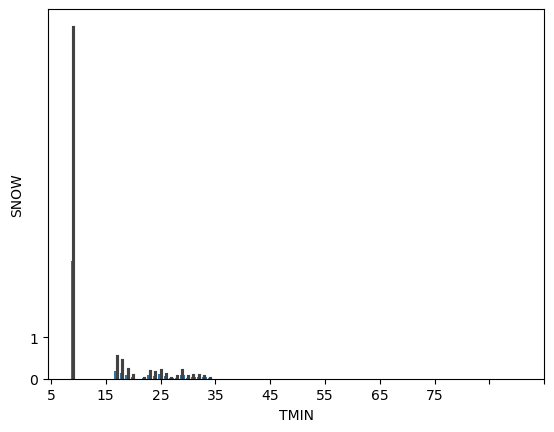

In [66]:
#snow and TMIN


sns.barplot(x='TMIN', y='SNOW', data=new_df)
plt.xticks(range(0,100, 10))
plt.yticks(range(0,2,1))
plt.show()

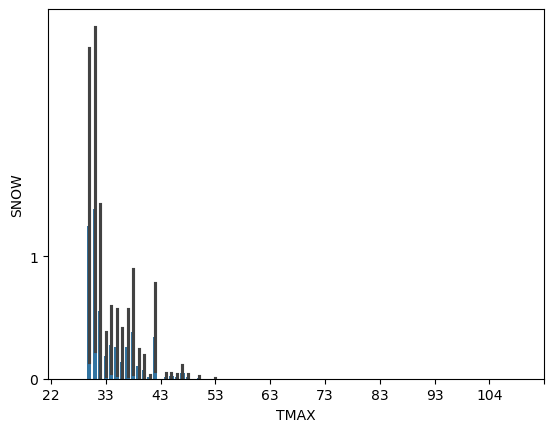

In [67]:
#snow and TMAX


sns.barplot(x='TMAX', y='SNOW', data=new_df)
plt.xticks(range(0,100, 10))
plt.yticks(range(0,2,1))
plt.show()

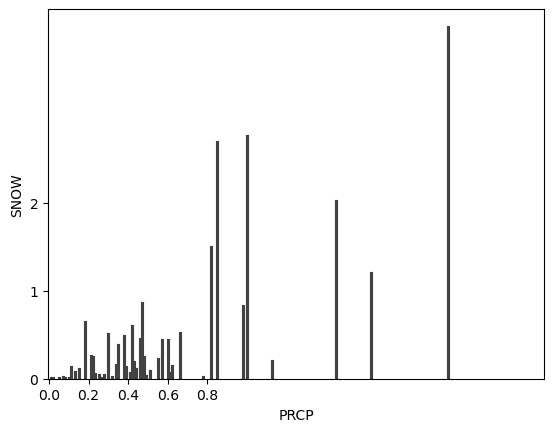

In [68]:
#snow and PRCP


sns.barplot(x='PRCP', y='SNOW', data=new_df)
plt.xticks(range(0,100, 20))
plt.yticks(range(0,3,1))
plt.show()



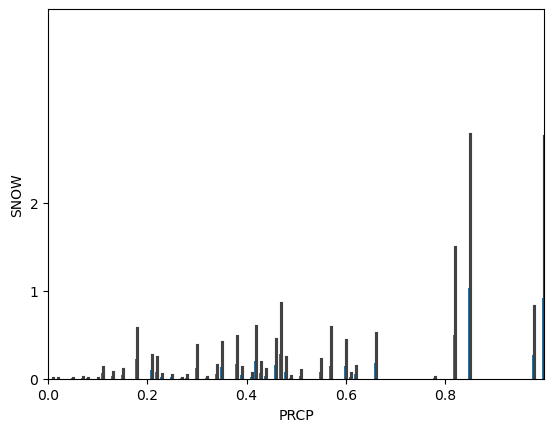

In [69]:
#snow and PRCP again with different viewing


sns.barplot(x='PRCP', y='SNOW', data=new_df)
plt.xticks(range(0,100, 20))
plt.xlim(0, 100)
plt.yticks(range(0,3,1))
plt.show()



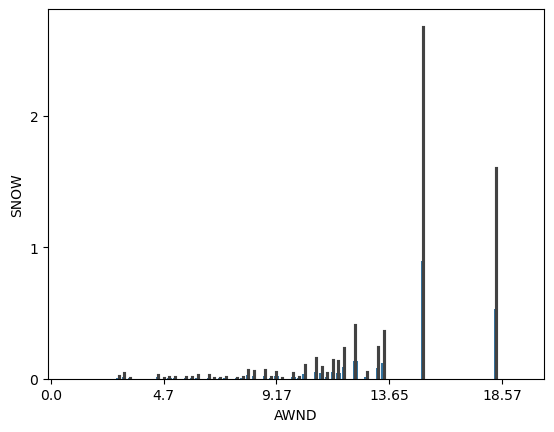

In [70]:
#snow and AWND


sns.barplot(x='AWND', y='SNOW', data=new_df)
plt.xticks(range(0,100, 20))
plt.yticks(range(0,3,1))
plt.show()



In [71]:
# Split the Dataset into Train and Test Sets





#print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)



#Split the data
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#print shape
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(10412, 4) (2604, 4) (10412,) (2604,)


In [72]:
# create and fit the linear regression model
# with help from statology.org

#create the model
model = LinearRegression()

#fit the model
#model.fit(X_train_scaled, y_train)
model.fit(X_train, y_train)

# Display the coefficients
print('Intercept:', model.intercept_)
print('Coefficients:', model.coef_)


Intercept: 0.09107065769548559
Coefficients: [ 0.00260383  0.02794244 -0.00166988  0.00039292]


In [73]:
#prediction on test set

# Make predictions
y_pred = model.predict(X_test)

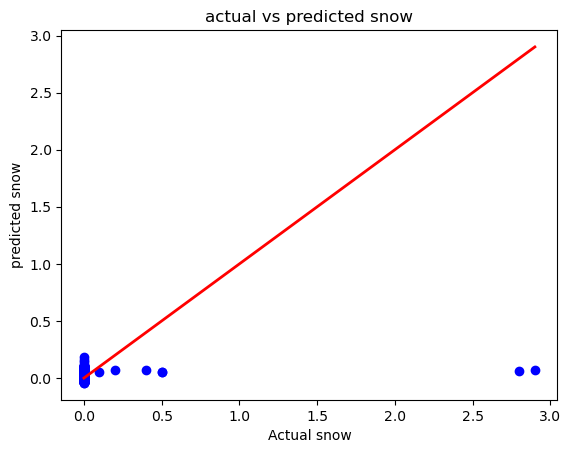

In [74]:


plt.scatter(y_test, y_pred, color='blue')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', linewidth=2)
plt.xlabel('Actual snow')
plt.ylabel('predicted snow')
plt.title('actual vs predicted snow')
plt.show()

In [75]:
# evaluate the model
# mean squared error and squared value

#mean squared error
mse = mean_squared_error(y_test, y_pred)

#r -squared
r2 = r2_score(y_test, y_pred)

print(mse)
print(r2)

0.006917982623763593
-0.06349004021254046


In [76]:
#Ridge regression now
# with help from statology.org
#ok now other algorithm ridge regression
X # response variables
X = X[['AWND', 'PRCP', 'TMAX', 'TMIN']]
y # predictor

#define cross-validation method to evaluate model
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=42)

#define model
model = RidgeCV(alphas=arange(0,1,0.01), cv=cv, scoring='neg_mean_absolute_error')

#fit model
model.fit(X,y)

#display lambda that produced the lowest test MSE
print(model.alpha_)

0.99


In [77]:
# use the model to make predictions


new = [15, 0.03, 58, 23] # manually made values for prediction list

#predict snow value using ridge regression model
model.predict([new])

C:\Users\dglas\anaconda3\envs\itcs-3156\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RidgeCV was fitted with feature names
  warnings.warn(


array([0.03583284])

In [ ]:
#based on prediction above, for the day that has: 
#average wind speed of 15
#precipitation of 0.03
#temperature maximum of 58 fahrenheit
#temperature minimum of 23 fahrenheit

#it has a predicted snow amount of  0.03583284